Schrödinger's Equation - Finite Well and Harmonic Oscillators
=====
# Barry O'Donnell

## 23/11/2019

In this assignment, I will be using a numerical method of solving differential equations of order 2. 

The differential equation in this case is 'Schrödinger's Equation' (SE) and my numerical method is the Runge-Kutta of the 4th-order (RK4).

Schrödinger's Equation can be reduced down to a position-dependent-wavefunction which is what we are working with. The formula is;
### $$ \frac{d^2\phi(x)}{dx^2} = -\frac{2m}{\hbar^2} [E-V(x)] \phi(x) $$
This can be simplified further, considering we are working with a box of size 1nm, we can write this equation as;
### $$ \frac{d^2\phi(x)}{dx^2} = -26.2 [E-V(x)] \phi(x) $$

Where:
- $\phi$ is the time-independent wavefunction of SE,
- $E$ is the energy of the particle
- $V(x)$ is the potential at position '$x$'

### Task 1
- I will define the numerical method I am using (RK4) as a function
- I will use this function to calculate a particle in a finite-potential well
- I will then plot a graph of the wavefunction and the probability distribution of the particle

### Task 2
- I will alter my wavefunction formula to be able to calculate a harmonic oscillator
- I will, once again, use my function to calculate the wavefunction and probability distribution of the particle
- I will then plot a graph of both the wavefunction and the probability distribution.

----

I have previously described my method of transforming the RK4 method into a method used to calculate the wavefunction of a particle in the previous assignment, and to save space, I have scrapped the definition from this assignment.

I have also copy and pasted my previous assignment's functions to this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Defining the above formula
##  This will be used in the Runge-Kutta method for calculating 'phi'
def d2_phi(x, phi, L=1, E=0.09, V=100000, harmonic=False, k=0):
    """ 
    Calculates the second-derivative of the wavefunction 'phi'.

    Returns: Float / Array of floats

    Args;
        'x'   :- Float / Array of floats representing position in Well
        'phi' :- Float / Array of floats repr. wavefunction 'y' values
        'L'   :- Float, repr. Well width
        'E'   :- Float, repr. particle's energy (in eV)
        'V'   :- Float, repr. Potential outside of well walls
        'harmonic' :- Bool., checks if working with Harmonic Oscillators or not
        'k'   :- Float, repr. the force constant of a spring
        
    """
    ## Checks if currently calculating inside well
    ##  Inside well, V = 0
    ##  Also checks if working with Harmonic Oscillator
    if harmonic is False:
        if abs(x) < L:
            return (-26.2 * (E) * phi)
        else:
            return (-26.2 * (E - V) * phi)
    
    else:
        k = 12.2
        Vx = (k * x**2) / 2
        
        if abs(x) < L:
            return (-26.2 * (E) * phi)
        else:
            return (-26.2 * (E - Vx) * phi)
        
        
        
## Defining Runge-Kutta of the fourth order
##  The formula I am following is from 
##    -- https://i.stack.imgur.com/B8ePj.png --
##  This specific RK4 is specialised for the wavefunction
##  This is apparent when calculating 'dv' as 'v' in this situation is not
##   called upon, as 'dv' is not dependent on 'v'
def RungeKutta_fourth(start=0, end=1, steps=10, L=1, E=0.04, V=100000, state=1, harmonic=False, k=0):
    """
    Numerically solves the wavefunction 'phi'.
    
    Returns: Array of Floats (Position), Array of Floats (Phi)
    
    Args;
        'start' :- int., repr. the starting position of our calculation
        'end'   :- int., repr. the end postion of our calculation
        'steps' :- int., repr. the amount of steps needed to go from 'start' to 'end'
        'L'     :- Float, repr. Well width
        'E'     :- Float, repr. particle's energy (in eV)
        'V'     :- Float, repr. Potential outside of well walls
        'state'  :- int., check for
        'harmonic' :- Bool., checks if working with Harmonic Oscillators or not
        'k'   :- Float, repr. the force constant of a spring
    """
    ## Defines 2 arrays
    ##  Here, 'x' represents 'phi' from out original equation
    ##   and 'v' represents the first derivative of 'phi' with respect to 'x'
    x = np.zeros(steps)
    v = np.zeros(steps)
    
    ## Checks if the state of the particle is even or odd for initial values
    ##  I found that the 'v' of ODD functions depended heavily on the actual state of the particle
    ##  If the 'v' was left as '1' for each state, the max peak of each wavefunction slowly got smaller and
    ##  smaller for each increasing state
    if (state % 2) != 0:
        x[0], v[0] = 1, 0
    else:
        if harmonic is False:
            x[0], v[0] = 0, 1.1 * state
        else:
            x[0], v[0] = 0, 1.5 * state**2
    ## Getting an array of 'steps' in length of evenly spaced seperations between
    ##  'start' and 'end'
    t = np.linspace(start, end, num=steps)
    
    ## Calculating the 'step size' 'h'
    h = t[1] - t[0]
    
    ## Setting up the exponential denominator for later
    j=1
    
    ## Begin for loop to calculate the wavefunction 'x' ('phi')
    for i in range(steps-1): 
        dx_1 = h * v[i]
        dv_1 = h * d2_phi(t[i], x[i], L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_2 = h * (v[i] + dv_1/2)
        dv_2 = h * d2_phi(t[i] + h/2, x[i] + dx_1/2, L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_3 = h * (v[i] + dv_2/2)
        dv_3 = h * d2_phi(t[i] + h/2, x[i] + dx_2/2, L=L, E=E, V=V, harmonic=harmonic, k=k)
        
        dx_4 = h * (v[i] + dv_3)
        dv_4 = h * d2_phi(t[i] + h, x[i] + dx_3, L=L, E=E, V=V, harmonic=harmonic, k=k)
                    
        dx_tot = (dx_1 + 2*dx_2 + 2*dx_3 + dx_4) / 6
        dv_tot = (dv_1 + 2*dv_2 + 2*dv_3 + dv_4) / 6
        
        x[i+1] = x[i] + dx_tot
        v[i+1] = v[i] + dv_tot
        
    ## Return t, x for user to plot later
    return t, x



In [3]:
## Defining a function to easily plot the outputs of the Runge-Kutta method
def WellPlot(x, phi, L=1, state=1):
    """
    Produces plots for wavefunctions in wells
    
    Returns: 2 Plots;
                A wavefunction plot
                Probability Distribution plot
    Args;
        'x'    :- Float / Array of floats representing position in Well
        'phi'  :- Float / Array of floats repr. wavefunction 'y' values
        'L'    :- Float, repr. Well width
        'state' :- int., repr. state of particle
    """
    
    ## Finds the extent of the x-axis
    x_max = abs(max(x))
    
    ## Begin plot definitions
    
    ##  First plot shows the wavefunction in all it's glory
    
    ##  Checks if the current state is ODD or EVEN and changes the sign for
    ##   the `np.flip()` function. ('EVEN' has y axis symmetry, 'ODD' has inverted across axis)
    
    ##  Horizontal Line is added in for value '0'
    ##  Vertical Lines are added to represent the walls of the Well
    
    plt.figure(1, (8,5))
    plt.plot(x, phi, 'b')
    if (state % 2) != 0:
        plt.plot(-np.flip(x), np.flip(phi), 'b')
    else:
        plt.plot(-np.flip(x), -np.flip(phi), 'b')
    plt.xlim(-x_max,x_max)
    plt.ylim(-1,1.10)
    plt.title("Wave of particle at state 'n = {}'".format(state))
    plt.ylabel("Potential of well (eV)")
    plt.xlabel('Position in well (nm)')
    plt.axhline(color='k')
    plt.axvline(-L, color='r')
    plt.axvline(L, color='r', label='Wall')
    plt.legend()
    
    
    plt.figure(2, (8,5))
    plt.plot(x, phi**2, 'b')
    plt.plot(-np.flip(x), np.flip(phi)**2, 'b')
    plt.xlim(-x_max,x_max)
    plt.ylim(-0.25,1.45)
    plt.title("Probability Curve of particle at state 'n = {}'".format(state))
    plt.xlabel('Position in well (nm)')
    plt.ylabel('Probability of position')
    plt.axhline(color='k')
    plt.axvline(-L, color='r', label='Wall')
    plt.axvline(L, color='r')
    plt.legend()
    
    
    plt.show()

In [4]:
## Defining a function to easily plot the outputs of the Runge-Kutta method
##  This was made for the 'for' loop I use at the end of `Task 2`
def WellSubPlot(x, phi, L=1, state=0):
    """
    Produces subplots for wavefunctions in wells
    
    Returns: 2 Plots;
                A wavefunction plot
                Probability Distribution plot
    Args;
        'x'    :- Float / Array of floats representing position in Well
        'phi'  :- Float / Array of floats repr. wavefunction 'y' values
        'L'    :- Float, repr. Well width
        'state' :- int., repr. state of particle
    """
    ## Finds the extent of the x-axis
    x_max = abs(max(x))
    
    ## Define plot size
    f = plt.figure(figsize=(15,6))    
    
    ## Define subplot region
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    
    ## Begin plot definitions
    ##  First plot shows the wavefunction in all it's glory
    
    ##  Checks if the current state is ODD or EVEN and changes the sign for
    ##   the `np.flip()` function. ('EVEN' has y axis symmetry, 'ODD' has inverted across axis)
    
    ##  Horizontal Line is added in for value '0'
    ##  Vertical Lines are added to represent the walls of the Well
    
    ax.plot(x, phi, 'b')
    if (state % 2) != 0:
        ax.plot(-np.flip(x), np.flip(phi), 'b')
    else:
        ax.plot(-np.flip(x), -np.flip(phi), 'b')
    ax.set_title("Wave of particle at state 'n = {}'".format(state))
    ax.set_ylabel("Potential of well (eV)")
    ax.set_xlabel('Position in well (nm)')   
    ax.set_xlim(-x_max,x_max)
    ax.set_ylim(-1,1.10)
    ax.axhline(color='k')
    ax.axvline(-L, color='r')
    ax.axvline(L, color='r', label='Wall')
    ax.legend()
    
    ax2.plot(x, phi**2, 'b')
    ax2.plot(-np.flip(x), np.flip(phi)**2, 'b')
    ax2.set_title("Probability Curve of particle at state 'n = {}'".format(state))
    ax2.set_xlabel('Position in well (nm)')
    ax2.set_ylabel('Probability of position')
    ax2.set_xlim(-x_max,x_max)
    ax2.set_ylim(-0.25,1.45)
    ax2.axhline(color='k')
    ax2.axvline(-L, color='r', label='Wall')
    ax2.axvline(L, color='r')
    ax2.legend()
    
    plt.show()

---------

## Task 1
To begin, I'm going to guess the energy for the ground state of the particle.
Using the 'Shooting Method', I try to manually change the varibles until it is as accuracte as I want it to be.

Here my goal is to be as accurate as I can to the **5th significant figure**. This ensures a nice, well-fitting graph.

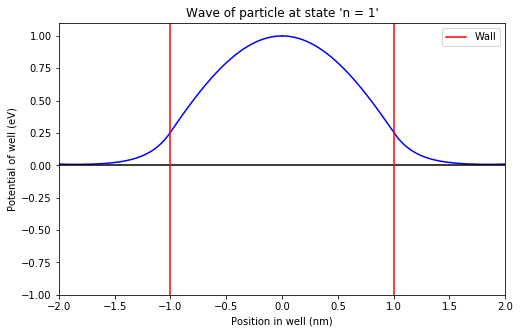

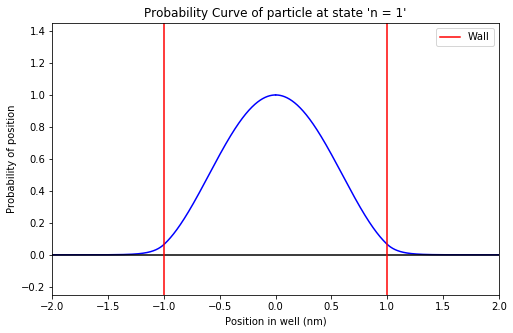

In [5]:
## Define the amount of steps needed
n = 1000

## Introduce well potential (eV)
V = 1

## Particle energy (eV)
E = 0.065729


x, phi = RungeKutta_fourth(start=0, end=2, steps=n, E=E, V=V, state=1)

WellPlot(x, phi, state=1)


The energy that I found works best is '**0.065729 eV**' for the ground state solution.

Using the same method as before, I will simply keep guessing the energy of the higher states.

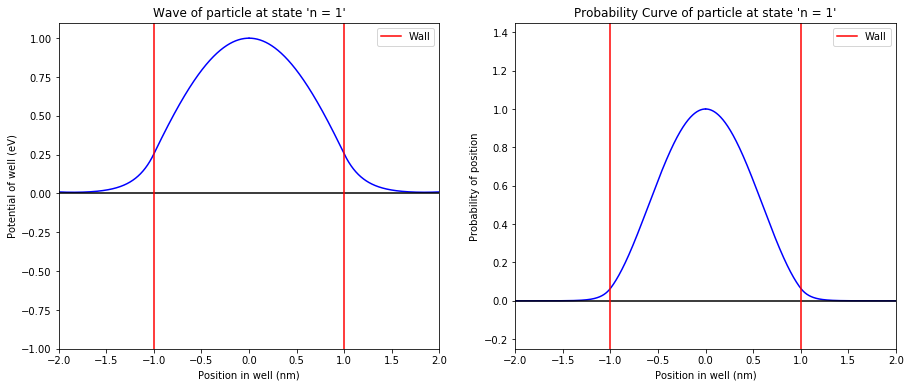

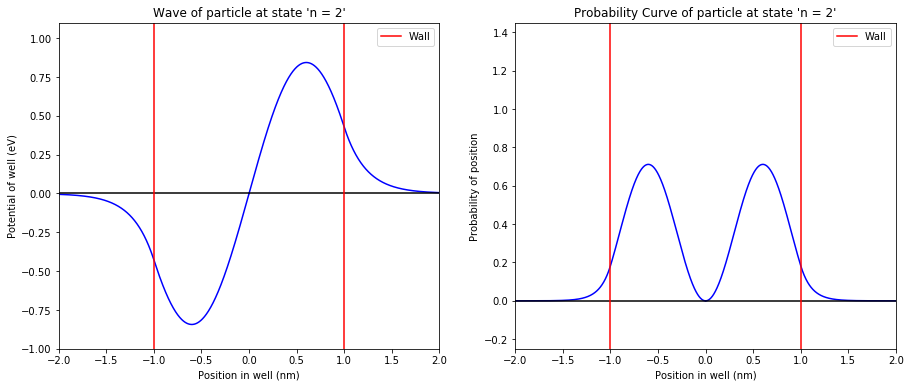

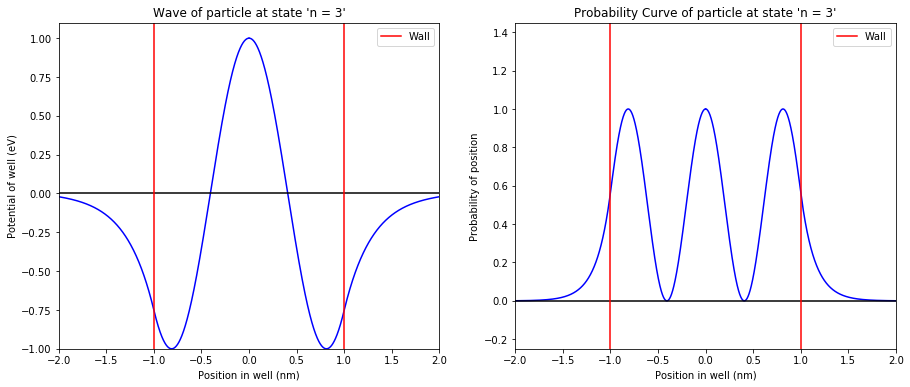

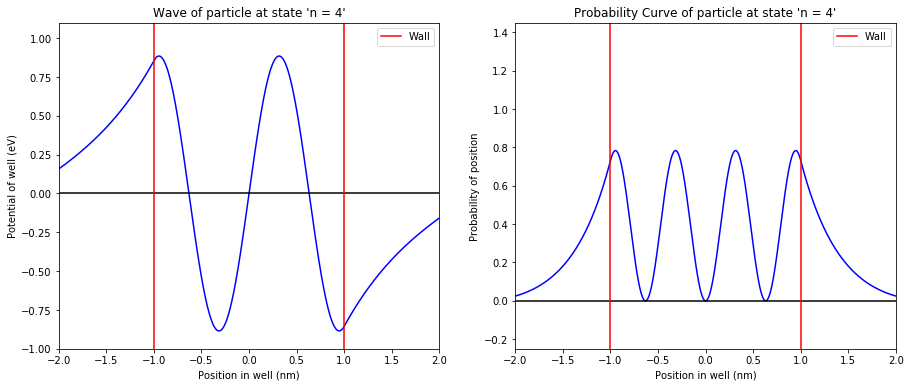

In [6]:
## Define steps taken
n = 1000

## Introduce Well potential
V = 1

## Introduce particular particle energy for each state (eV)
##  Here, E[1] is for 'n=2' state 
E = [0.065729, 0.25972, 0.56889, 0.9436]

## Begin for loop to calculate wavefunction for each state up to 'n=4'
for i in range(1,5):
    x, phi = RungeKutta_fourth(start=0, end=2, steps=n, E=E[i-1], V=V, state=i)

    WellSubPlot(x, phi, state=i)


Unlike 'Assignment 4', the energy needed doesn't quite scale as well here, and required quite a good bit of guessing.

The limit of this well is 'n=4', as the next state above would have energy **greater** than that of the well's (>1eV).

Compared to the values of the infinite potential well, they all appear larger than their state counterpart.

|State|Infinite Potential|Finite Potential (=1eV) (eV)|%-Difference|
|:--------:|:--------:|:--------:|:--------:|
|n=1|0.095|0.065729|~31%|
|n=2|0.38|0.25972|~32%|
|n=3|0.855|0.56889|~33%|
|n=4|1.52|0.9436|~38%|



------------

## Task 2

To begin *Task 2*, I will first need to modify my `d2_phi` function. I will have to use the Harmonic Oscillator wavefunction instead of the standard one I was using previously.

This function is:
### $$ \frac{d^2\phi(x)}{dx^2} = -26.2 [E-\frac{1}{2}kx^2] \phi(x) $$

Where;
 - $k$ is the 'Force Constant',
 - $x$ is the position in the well.

This should produce a wavefunction similar to that of one in a crystal.

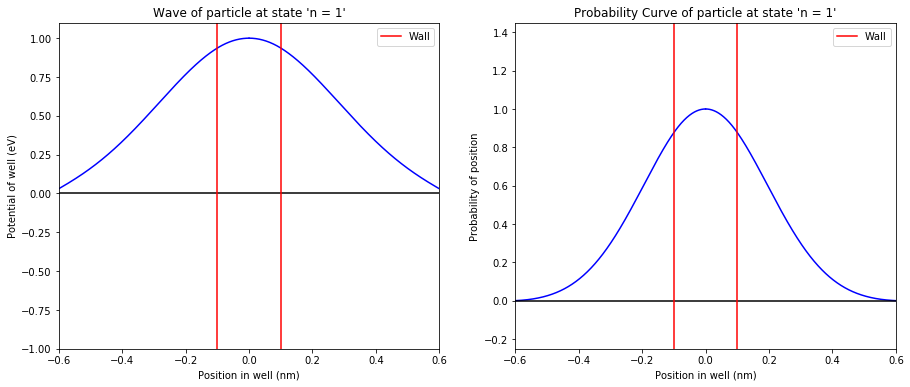

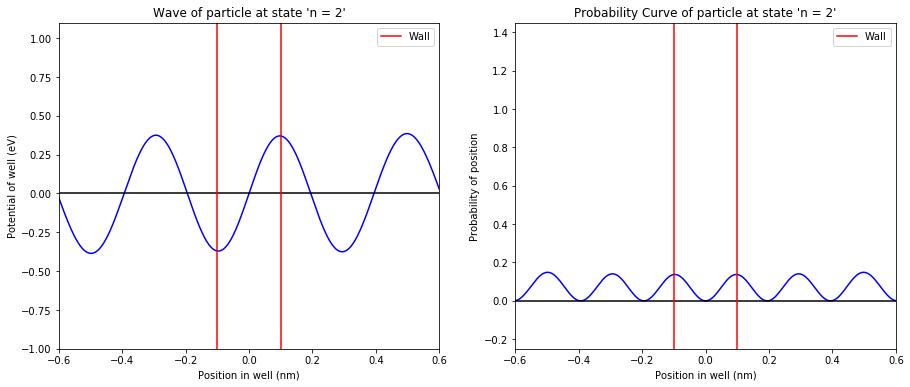

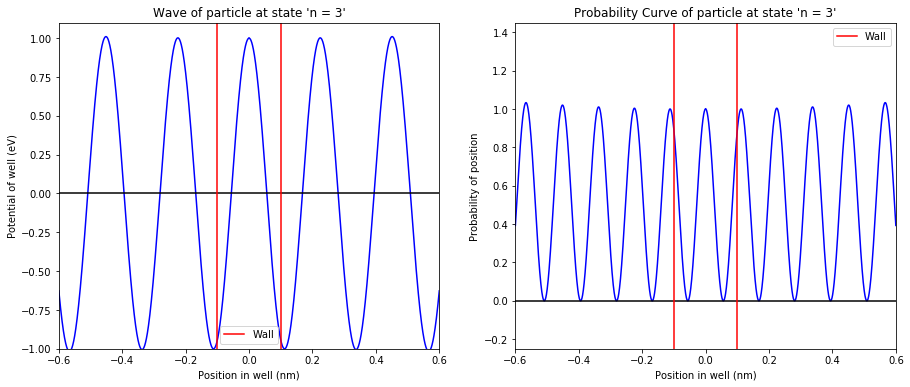

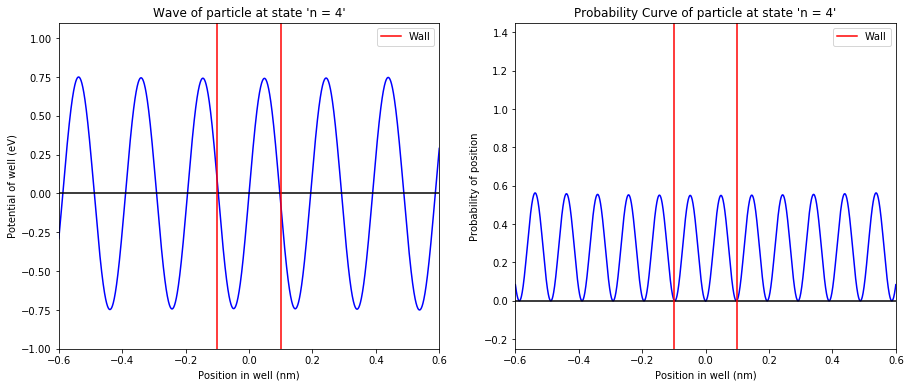

In [7]:
## Defines steps
n = 1000

## Energies chosen for this Harmonic Oscillators states
E = [0.49, 10, 30, 40]

## Width of the well
L = 0.1

## Begins 'for' loop to calculate the first 4 states
for i in range(1,5):
    x, phi = RungeKutta_fourth(start=0, end=L+(0.5), L=L, steps=n, E=E[i-1], state=i, harmonic=True, k=12.2)

    WellSubPlot(x, phi, L=L, state=i)

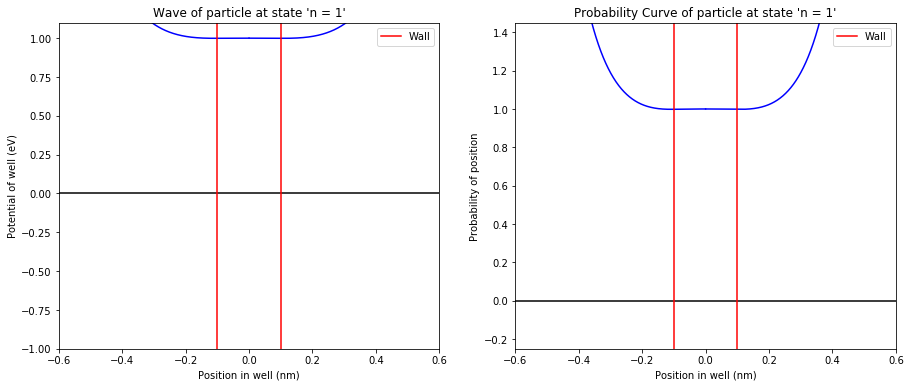

In [14]:
## Defines steps
n = 1000

## Energies chosen for this Harmonic Oscillators states
E = (1/2) * 0.0118
## Width of the well
L = 0.1

x, phi = RungeKutta_fourth(start=0, end=L+(0.5), L=L, steps=n, E=E, state=1, harmonic=True, k=12.2)

WellSubPlot(x, phi, L=L, state=1)

I wasn't able to find a solution to this part of the task